In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, hilbert, welch
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
np.random.seed(42)

In [3]:
for dirname, _, filenames in os.walk('datasets'):
    dataFile_quant = np.empty(len(filenames), dtype='object')
    for ii, filename in enumerate(filenames, start=0):
        dataFile_quant[ii] = (os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

0_amps_0.4_phases_70_snr_29.csv
datasets\fileID_10020901_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_15.csv
datasets\fileID_10020902_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_17.csv
datasets\fileID_10020903_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_19.csv
datasets\fileID_10020904_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_21.csv
datasets\fileID_10020905_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_23.csv
datasets\fileID_10020906_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_25.csv
datasets\fileID_10020907_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_27.csv
datasets\fileID_10020908_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_29.csv
datasets\fileID_10021001_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_15.csv
datasets\fileID_10021002_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_17.csv
datasets\fileID_10021003_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_19.csv
datasets\fileID_10021004_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_21.

In [4]:
featuresDF = pd.DataFrame(columns=['time', 'signal', 'inPhase', 'quadrature', 'frequency', 'amplitude', 'phase', 'snr'])
for ii in range(len(dataFile_quant)):
    df_time = np.transpose(np.array(pd.read_csv(dataFile_quant[ii], header= None, usecols=[0], dtype='float64')))[0]
    df_gen = np.transpose(np.array(pd.read_csv(dataFile_quant[ii], header= None, usecols=[1], dtype='float64')))[0]
    analytical_data = hilbert(df_gen)
    df_ip = analytical_data.real
    df_quad = analytical_data.imag
    df_freq  = float(os.path.split(dataFile_quant[ii])[1].split('.csv')[0].split('_')[5])
    df_amp   = float(os.path.split(dataFile_quant[ii])[1].split('.csv')[0].split('_')[7])
    df_phase = float(os.path.split(dataFile_quant[ii])[1].split('.csv')[0].split('_')[9])
    df_snr =   int(os.path.split(dataFile_quant[867])[1].split('.csv')[0].split('_')[11])
    featuresDF = featuresDF.append({'time': df_time,
                                    'signal': df_gen, 
                                    'inPhase': df_ip, 'quadrature': df_quad,
                                    'frequency': df_freq,
                                    'amplitude': df_amp, 'phase': df_phase,
                                    'snr': df_snr}, ignore_index=True)

#featuresDF['frequency'] = pd.to_numeric(featuresDF['frequency'])
featuresDF['snr'] = pd.to_numeric(featuresDF['snr'])
print(featuresDF.head())
print("\nData Types")
print(featuresDF.dtypes)

                                                time  \
0  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
1  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
2  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
3  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
4  [0.0, 5.0025012506253105e-09, 1.00050025012506...   

                                              signal  \
0  [-0.0301758692483727, 0.247012551647326, 0.379...   
1  [-0.0338411189229424, 0.160860218934466, 0.262...   
2  [-0.151111990818099, 0.0622128470375053, 0.138...   
3  [0.0539086428790857, 0.16714599251955, 0.15144...   
4  [-0.0374802278692187, 0.132596083166952, 0.142...   

                                             inPhase  \
0  [-0.03017586924837267, 0.24701255164732602, 0....   
1  [-0.033841118922942386, 0.160860218934466, 0.2...   
2  [-0.151111990818099, 0.062212847037505396, 0.1...   
3  [0.053908642879085686, 0.1671459925195501, 0.1...   
4  [-0.037480227869218695, 0.1325960831669521,

In [5]:
fs = 200e6        # Simulation sampling rate (Hz)
fs_adc = 100e6    # ADC sampling rate (Hz)
t_end = 1e-5     # Simulation end time (seconds)
t = np.linspace(0, t_end, int(fs*t_end))
print("There are {} elements per sample".format(len(t)))

There are 2000 elements per sample


In [6]:
# Which Figure to show for examples
showFig = 4

Signal Frequency: 4000000.0
Signal Amplitude: 0.3
Signal Phase:     0.0


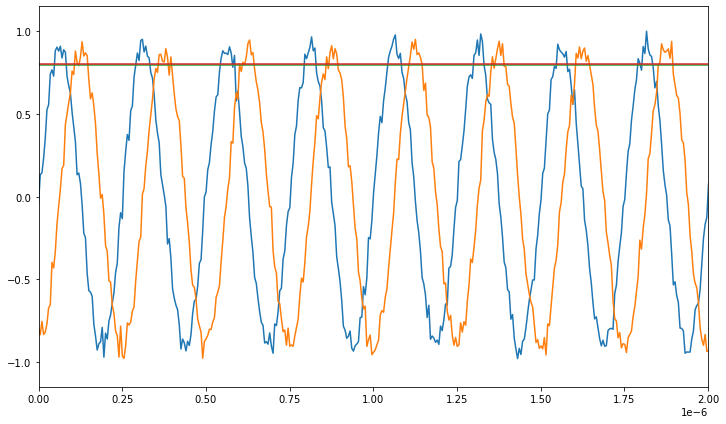

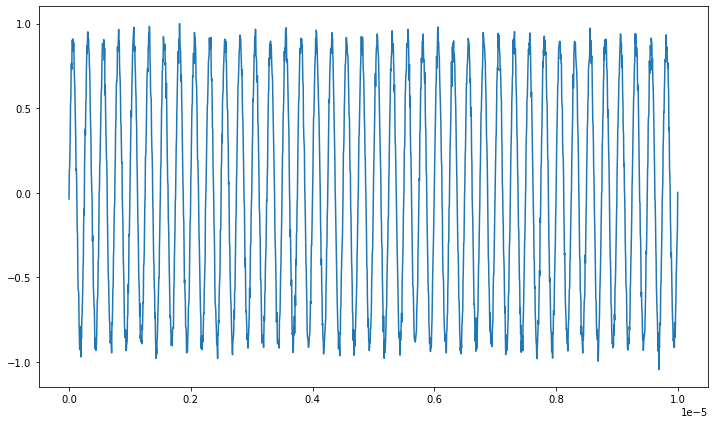

In [7]:
#IQ Data testing
def FilteredSignal(signal, fs, cutoff):
    B, A = butter(1, cutoff / (fs / 2), btype='low')
    filtered_signal = filtfilt(B, A, signal, axis=0)
    return filtered_signal

time = featuresDF.at[showFig, 'time']
testdata = featuresDF.at[showFig, 'signal']
cutoff = featuresDF.at[showFig, 'frequency']
analytical_testdata = hilbert(testdata)
amplitudeEnvelope = np.abs(analytical_testdata)
filteredSignal = FilteredSignal(amplitudeEnvelope, fs, cutoff)

print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(12,7))
plt.xlim(0,2e-6)
plt.plot(time, analytical_testdata.real)
plt.plot(time, analytical_testdata.imag)
plt.plot(amplitudeEnvelope)
plt.plot(filteredSignal)

plt.figure(figsize=(12,7))
plt.plot(time, testdata)

In [8]:
iq_sig = featuresDF.at[showFig, 'inPhase']*np.cos(2*np.pi*fs*t) - featuresDF.at[showFig, 'quadrature']*np.sin(2*np.pi*fs*t)

Signal Frequency: 4000000.0
Signal Amplitude: 0.3
Signal Phase:     0.0


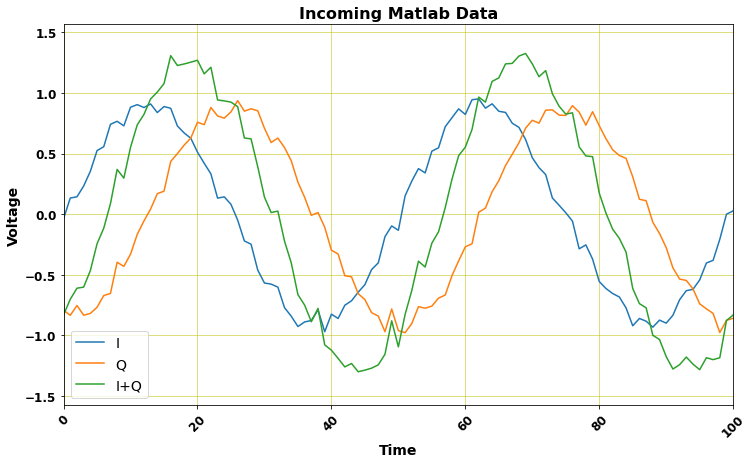

In [9]:
print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(12,7))
plt.plot(featuresDF.at[showFig, 'inPhase'])
plt.plot(featuresDF.at[showFig, 'quadrature'])
plt.plot(featuresDF.at[showFig, 'inPhase'] + featuresDF.at[showFig, 'quadrature'])
plt.legend(['I', 'Q', 'I+Q'], loc='lower left', prop={'size': 14})
plt.title('Incoming Matlab Data', weight='bold', fontsize=16)
plt.xlabel('Time', weight='bold', fontsize=14)
plt.ylabel('Voltage', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)
plt.xlim(0,100)
plt.show()

Signal Frequency: 4000000.0
Signal Amplitude: 0.3
Signal Phase:     0.0


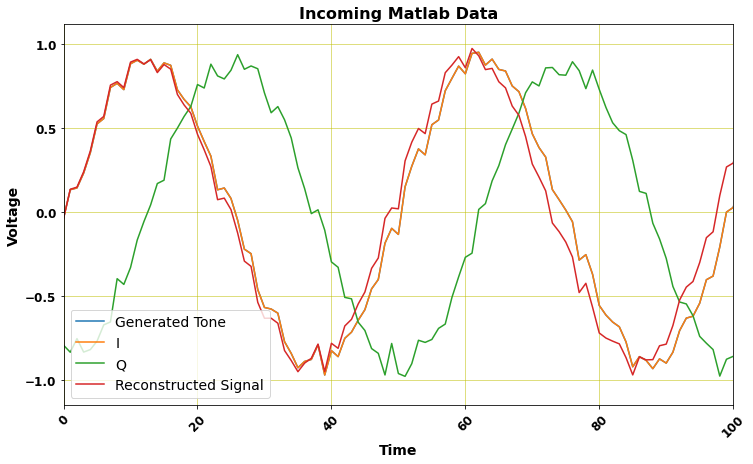

In [10]:
print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(12,7))
plt.plot(featuresDF.at[showFig, 'signal'])
plt.plot(featuresDF.at[showFig, 'inPhase'])
plt.plot(featuresDF.at[showFig, 'quadrature'])
plt.plot(iq_sig)
plt.legend(['Generated Tone', 'I', 'Q', 'Reconstructed Signal'], loc='lower left', prop={'size': 14})
plt.title('Incoming Matlab Data', weight='bold', fontsize=16)
plt.xlabel('Time', weight='bold', fontsize=14)
plt.ylabel('Voltage', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)
plt.xlim(0,100)
plt.show()

Signal Frequency: 4000000.0
Signal Amplitude: 0.3
Signal Phase:     0.0


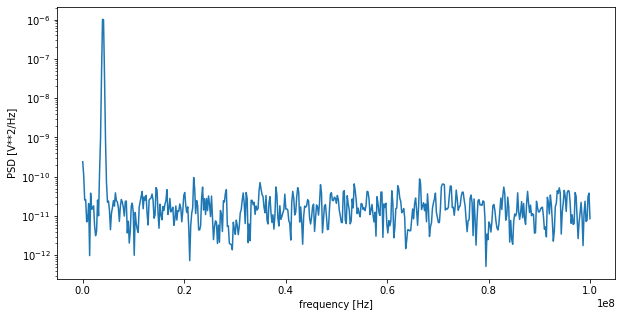

In [11]:
f, Pxx_den = welch(featuresDF.at[showFig,'signal'], fs, nperseg=1024)

print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(10,5))
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape data
signal_df_r = featuresDF
signal_df_r['iq'] = ''
for ii in range(0, len(signal_df_r)):
    signal_sample = signal_df_r.at[ii,'signal']
    i_sample = signal_df_r.at[ii,'inPhase']
    q_sample = signal_df_r.at[ii,'quadrature']

    # Normalize the dataset
    signal_sample = np.asarray(signal_sample).reshape(-1,1)
    i_sample = np.asarray(i_sample).reshape(-1,1)
    q_sample = np.asarray(q_sample).reshape(-1,1)

    signal_sample = scaler.fit_transform(signal_sample)
    i_sample = scaler.fit_transform(i_sample)
    q_sample = scaler.fit_transform(q_sample)

    #signal_sample = signal_sample.reshape(width, height, 1)
    #signal_sample = signal_sample.reshape(50, 40, 1)
    signal_df_r.at[ii,'signal'] = np.array(signal_sample).squeeze()

    iq_sample = np.concatenate([i_sample, q_sample], axis=1)

    #iq_sample = signal_sample.reshape((iq_sample.shape[0], iq_sample.shape[1], 1))
    iq_sample = np.expand_dims(iq_sample, 2)
    signal_df_r.at[ii,'iq'] = np.array(iq_sample)

In [13]:
print(signal_df_r.shape)
print(signal_df_r.at[showFig,'iq'].shape)

(6400, 9)
(2000, 2, 1)


In [14]:
#Split the dataset 
from sklearn.model_selection import train_test_split 
train_df, test_validation_df = train_test_split(signal_df_r, train_size=0.8, test_size=0.2, random_state = 42, shuffle=True)
valid_df, test_df = train_test_split(test_validation_df, train_size=0.5, test_size=0.5, random_state = 42, shuffle=True)
print("Shape of train inputs {}, train target {}".format(train_df['signal'].iloc[0].shape, train_df.shape))
print("Shape of validation inputs {}, validation target {}".format(valid_df['signal'].iloc[0].shape, valid_df.shape))
print("Shape of test inputs {}, test target {}".format(test_df['signal'].iloc[0].shape, test_df.shape))

Shape of train inputs (2000,), train target (5120, 9)
Shape of validation inputs (2000,), validation target (640, 9)
Shape of test inputs (2000,), test target (640, 9)


In [39]:
train_features = np.array(train_df.iq.to_list()).squeeze()
valid_features = np.array(valid_df.iq.to_list()).squeeze()
test_features = np.array(test_df.iq.to_list()).squeeze()

train_labels = np.array(train_df.amplitude.to_list())
valid_labels = np.array(valid_df.amplitude.to_list())
test_labels = np.array(test_df.amplitude.to_list())

In [16]:
#Import TensorFlow Libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, \
                                    ReLU, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import plot_model
from keras import backend as K

Using TensorFlow backend.


In [17]:
#ADDED CONFIG OPTIONS FOR STABILTY
#TensorFlow allocating all of the GPU memory 
#to itself when it initialises the session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
#Reset Default graph - Needed only for Jupyter Notebook
tf.compat.v1.reset_default_graph()
tf.compat.v1.set_random_seed(42)

In [18]:
# Model configuration
batch_size = 32
no_epochs = 300
verbosity = 1

In [19]:
modelType = "DNN"
modelName = "nanoConvPaper_v4"
logDir = "logging" + "\\" + modelType + "\\" + modelName
#tensorboard = TensorBoard(log_dir=logDir + "\\" + modelType + "\\" + modelName)
tensorboard = TensorBoard(log_dir=logDir)

In [23]:
modelDir = 'models'
modelSaveFile = modelDir + "\\" + modelType + "\\" + modelName + '.h5'

In [64]:
base_model = load_model(modelDir + "\\" + modelType + "\\" + "nanoConvPaper_v3.1" + ".h5")
base_model.summary()
base_model._layers.pop()
base_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2000, 2)]         0         
_________________________________________________________________
dense (Dense)                (None, 2000, 2)           6         
_________________________________________________________________
dense_1 (Dense)              (None, 2000, 2)           6         
_________________________________________________________________
dense_2 (Dense)              (None, 2000, 3)           9         
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
freq_extract (Dense)         (None, 1)                 6001      
Total params: 6,022
Trainable params: 6,022
Non-trainable params: 0
___________________________________________________________

In [65]:
#Set pre-trained model layers to not trainable
for layer in base_model.layers[:-2]:
    layer.trainable = False

In [66]:
#Add Layers
"""
input_layer = Input(shape=(2000,2))

regressor = Dense(2, activation='relu')(input_layer)
regressor = Dense(2, activation='relu')(regressor)
regressor = Dense(3, activation='relu')(regressor)
regressor = Flatten()(regressor)

freq_extract = Dense(1, activation=None, name='freq_extract')(regressor)
"""

regressor = base_model.output
amp_extract = Dense(1, activation=None, name='amp_extract')(regressor)

In [67]:
#Using Keras Model class
model = Model(inputs=base_model.input, #Pre-trained model input as input layer
                    #outputs=[freq_extract, amp_extract, phase_extract]) #Output layer added
                    outputs=amp_extract) #Output layer added

In [68]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2000, 2)]         0         
_________________________________________________________________
dense (Dense)                (None, 2000, 2)           6         
_________________________________________________________________
dense_1 (Dense)              (None, 2000, 2)           6         
_________________________________________________________________
dense_2 (Dense)              (None, 2000, 3)           9         
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
freq_extract (Dense)         (None, 1)                 6001      
_________________________________________________________________
amp_extract (Dense)          (None, 1)                 2   

In [69]:
model.compile(
            optimizer='adam', 
            loss='mse',
            #metrics=['accuracy']
            )

In [70]:
plot_model(model)

"dot" with args ['-Tps', 'C:\\Users\\game1\\AppData\\Local\\Temp\\tmp9xgiwtf9'] returned code: 1

stdout, stderr:
 b''
b"'dot.bat' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"



AssertionError: 1

In [71]:
history = model.fit(
                train_features, train_labels,
                validation_data=(valid_features, valid_labels),
                epochs=no_epochs,
                callbacks=[tensorboard],
                batch_size=batch_size,
                verbose=verbosity)

Train on 5120 samples, validate on 640 samples
Epoch 1/300
5120/5120 [==============================] - 1s 166us/sample - loss: 12.5628 - val_loss: 2.8294
Epoch 2/300
5120/5120 [==============================] - 1s 104us/sample - loss: 1.1099 - val_loss: 0.3838
Epoch 3/300
5120/5120 [==============================] - 1s 102us/sample - loss: 0.2684 - val_loss: 0.2317
Epoch 4/300
5120/5120 [==============================] - 1s 104us/sample - loss: 0.2239 - val_loss: 0.2241
Epoch 5/300
5120/5120 [==============================] - 1s 100us/sample - loss: 0.2159 - val_loss: 0.2178
Epoch 6/300
5120/5120 [==============================] - 1s 100us/sample - loss: 0.2085 - val_loss: 0.2036
Epoch 7/300
5120/5120 [==============================] - 0s 96us/sample - loss: 0.1968 - val_loss: 0.1933
Epoch 8/300
5120/5120 [==============================] - 1s 98us/sample - loss: 0.1886 - val_loss: 0.1840
Epoch 9/300
5120/5120 [==============================] - 1s 98us/sample - loss: 0.1796 - val_loss:

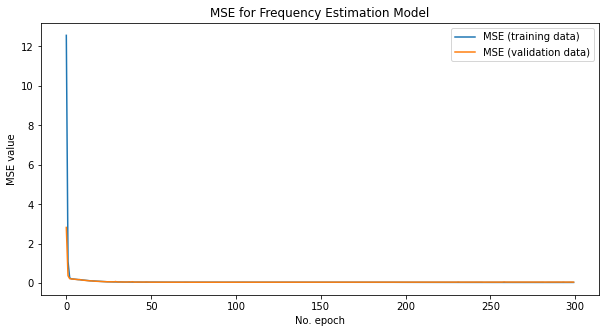

In [72]:
# Plot history: MSE
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.plot(history.history['val_loss'], label='MSE (validation data)')
plt.title('MSE for Frequency Estimation Model')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

In [73]:
model.save(modelSaveFile)

In [43]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logDir}

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 30628.

In [74]:
model = load_model(modelSaveFile)

In [75]:
freq_pred = model.predict(test_features)

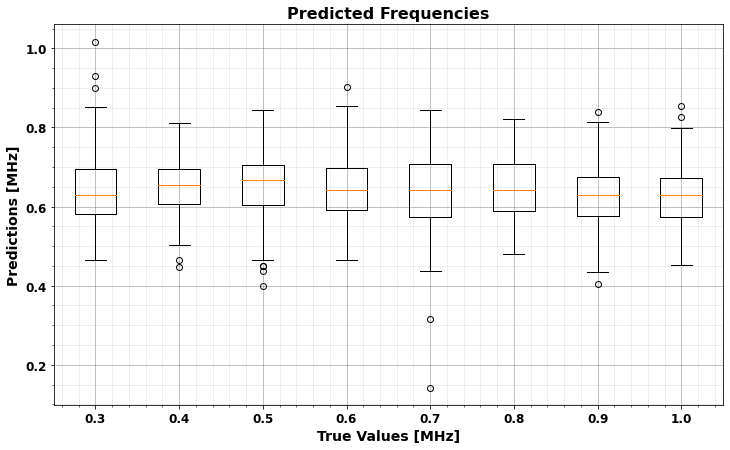

In [76]:
results = []
names = []
for freqs in np.unique(test_labels):
    results.append(freq_pred[np.where(test_labels == freqs)[0]].flatten())
    names.append(freqs.round(2))
fig = plt.figure(figsize =(12, 7)) 
ax = fig.add_subplot(111)
bp = ax.boxplot(results)
plt.yticks(weight='bold', fontsize=12)
ax.set_xticklabels(names, weight='bold', fontsize=12)
plt.title('Predicted Frequencies', weight='bold', fontsize=16)
plt.xlabel('True Values [MHz]', weight='bold', fontsize=14)
plt.ylabel('Predictions [MHz]', weight='bold', fontsize=14)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show(bp)

plt.figure(figsize =(10, 7)) 
plt.scatter(test_freq_val, freq_pred)
plt.xlabel('True Values [frequency]')
plt.ylabel('Predictions [frequency]')

In [77]:
mae = metrics.mean_absolute_error(test_labels, freq_pred)
mse = metrics.mean_squared_error(test_labels, freq_pred)
r2 = metrics.r2_score(test_labels, freq_pred)

print('R^2: ', r2)
print('MAE: ', mae)
print('MSE: ', mse)

R^2:  -0.2124143314003739
MAE:  0.21807882416062058
MSE:  0.06486579472767945


In [78]:
for num in np.arange(10):
    print("Predicted amplitude {}: {},  Actual Amplitude {}: {}".format(num, round(float(freq_pred[num][0]),3), num, test_labels[num].round(3)))
#print("Predicted frequency 21: {}, Actual Frequency 21: {}".format(round(float(freq_pred[21][0]),3), test_freq_val[21].round(3)))

Predicted amplitude 0: 0.625,  Actual Amplitude 0: 0.6
Predicted amplitude 1: 0.621,  Actual Amplitude 1: 0.6
Predicted amplitude 2: 0.646,  Actual Amplitude 2: 0.7
Predicted amplitude 3: 0.469,  Actual Amplitude 3: 0.3
Predicted amplitude 4: 0.598,  Actual Amplitude 4: 0.9
Predicted amplitude 5: 0.56,  Actual Amplitude 5: 0.4
Predicted amplitude 6: 0.548,  Actual Amplitude 6: 0.7
Predicted amplitude 7: 0.483,  Actual Amplitude 7: 0.9
Predicted amplitude 8: 0.537,  Actual Amplitude 8: 0.6
Predicted amplitude 9: 0.693,  Actual Amplitude 9: 0.7


In [50]:
closeness_1 = np.zeros(len(freq_pred))
for ii in range(len(freq_pred)):
    if freq_pred[ii][0].round(1) == test_labels[ii].round(1):
        closeness_1[ii] = 1
freq_closeness = (np.count_nonzero(closeness_1)/len(freq_pred))*100
print('Frequency predictions on the test set were accurate to 1 decimal place by %{}'.format(round(freq_closeness,2)))

Frequency predictions on the test set were accurate to 1 decimal place by %0.0


In [51]:
avg_accuracy = np.zeros((len(freq_pred),2))
for ii in range(len(freq_pred)):
    avg_accuracy[ii,0] = test_labels[ii] - freq_pred[ii][0]
    avg_accuracy[ii,1] = (test_labels[ii] - freq_pred[ii][0]) / test_labels[ii] * 100

print('Average Frequency Differed by {}Hz which was %{}'.format(avg_accuracy.mean(axis=0)[0].round(2), avg_accuracy.mean(axis=0)[1]))

Average Frequency Differed by -0.03Hz which was %-20.740344403829006


In [52]:
freq_pred_train = model.predict(train_features)

In [53]:
for num in np.arange(10):
    print("Predicted Amplitude {}: {},  Actual Amplitude {}: {}".format(num, round(float(freq_pred_train[num][0]),3), num, train_labels[num].round(3)))

Predicted Amplitude 0: 0.676,  Actual Amplitude 0: 1.0
Predicted Amplitude 1: 0.699,  Actual Amplitude 1: 0.3
Predicted Amplitude 2: 0.679,  Actual Amplitude 2: 0.3
Predicted Amplitude 3: 0.666,  Actual Amplitude 3: 0.4
Predicted Amplitude 4: 0.673,  Actual Amplitude 4: 0.9
Predicted Amplitude 5: 0.676,  Actual Amplitude 5: 0.7
Predicted Amplitude 6: 0.679,  Actual Amplitude 6: 0.4
Predicted Amplitude 7: 0.674,  Actual Amplitude 7: 0.8
Predicted Amplitude 8: 0.676,  Actual Amplitude 8: 0.8
Predicted Amplitude 9: 0.687,  Actual Amplitude 9: 0.4


In [54]:
closeness_1 = np.zeros(len(freq_pred_train))
for ii in range(len(freq_pred_train)):
    if freq_pred_train[ii][0].round(1) == train_labels[ii].round(1):
        closeness_1[ii] = 1
freq_closeness = (np.count_nonzero(closeness_1)/len(freq_pred_train))*100
print('Frequency predictions on the test set were accurate to 1 decimal place by %{}'.format(round(freq_closeness,2)))

Frequency predictions on the test set were accurate to 1 decimal place by %0.0


In [55]:
avg_accuracy = np.zeros((len(freq_pred_train),2))
for ii in range(len(train_labels)):
    avg_accuracy[ii,0] = train_labels[ii] - freq_pred_train[ii][0]
    avg_accuracy[ii,1] = (train_labels[ii] - freq_pred_train[ii][0]) / train_labels[ii] * 100

print('Average Frequency Differed by {}Hz which was %{}'.format(avg_accuracy.mean(axis=0)[0].round(2), avg_accuracy.mean(axis=0)[1]))

Average Frequency Differed by -0.03Hz which was %-21.376357198062756


# Generate reconstructions
num_reconstructions = 3
samples = noisy_input_test[:num_reconstructions]
reconstructions = model.predict(samples)

# Plot reconstructions
for i in np.arange(0, num_reconstructions):
    # Prediction index
    prediction_index = i + percentage_training
    # Get the sample and the reconstruction
    original = y_val_noisy[prediction_index]
    pure = y_val_pure[prediction_index]
    reconstruction = np.array(reconstructions[i]).reshape((width * height,))
    reconstruction = np.asarray(reconstruction).reshape(-1,1)
    reconstruction = scaler.inverse_transform(reconstruction)
    # Matplotlib preparations
    fig, axes = plt.subplots(1, 3)
    # Plot sample and reconstruciton
    axes[0].plot(original)
    axes[0].set_title('Noisy waveform')
    axes[0].set_xlim([0, 25])
    axes[1].plot(pure)
    axes[1].set_title('Purex_val_noisy')
    axes[1].set_xlim([0, 25])
    axes[2].plot(reconstruction)
    axes[2].set_title('Conv Autoencoder Denoised waveform')
    axes[2].set_xlim([0, 25])
    plt.show()

plt.figure(figsize=(10,5))
plt.plot(pure)
#plt.plot(quantized_df)
#plt.plot(trainPredictPlot_gen)
plt.plot(reconstruction)
plt.legend(['Generated Tone',
            #'Quantized Tone',
            #'Training Pred Gen', 
            'Reconstructed'], 
            loc='lower left', 
            prop={'size': 14})
plt.title('Reconstruction Results', weight='bold', fontsize=16)
plt.xlabel('Instant', weight='bold', fontsize=14)
plt.ylabel('Voltage', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)
plt.xlim(0, 33)
plt.show()

from scipy.signal import find_peaks

f_pred, Pxx_den_pred = signal.welch(reconstruction.squeeze(), fs, nperseg=1024)
f_input, Pxx_den_input = signal.welch(original.squeeze(), fs, nperseg=1024)


peaks_pred, _ = find_peaks(Pxx_den_pred, height=1e-12)
peaks_input, _ = find_peaks(Pxx_den_input, height=1e-9)
peaks_pred_vals = np.sort(Pxx_den_pred[peaks_pred])
peaks_input_vals = np.sort(Pxx_den_input[peaks_input])
peaks_pred_mm = np.zeros(2, dtype=int)
peaks_input_mm = np.zeros(2, dtype=int)
peaks_pred_mm[0] = np.where(Pxx_den_pred == peaks_pred_vals[-1])[0]
peaks_pred_mm[1] = np.where(Pxx_den_pred == peaks_pred_vals[-2])[0]
peaks_input_mm[0] = np.where(Pxx_den_input == peaks_input_vals[-1])[0]
peaks_input_mm[1] = np.where(Pxx_den_input == peaks_input_vals[-2])[0]

sfdr_pred = 20*np.log10(peaks_pred_vals[-1]/peaks_pred_vals[-2])
sfdr_input = 20*np.log10(peaks_input_vals[-1]/peaks_input_vals[-2])

print("SFDR Improvement is {}dB".format(round(sfdr_pred - sfdr_input, 3)))

plt.figure(figsize=(10,5))
plt.semilogy(f_input, Pxx_den_input)
plt.semilogy(f_pred, Pxx_den_pred)
plt.plot(f_pred[peaks_pred_mm], 
         Pxx_den_pred[peaks_pred_mm], 
         "x")
plt.plot(f_input[peaks_input_mm], 
         Pxx_den_input[peaks_input_mm], 
         "x")
plt.legend(['Input Quantized Tone', 'Reconstructed'], loc='best', prop={'size': 14})
plt.title('Welch Comparision of Input Signal vs Reconstructed Signal', weight='bold', fontsize=16)
plt.xlabel('frequency [Hz]', weight='bold', fontsize=14)
plt.ylabel('PSD [V**2/Hz]', weight='bold', fontsize=14)
plt.show()